In [129]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [130]:
# lectura de datos en Python y lo cargamos en la variable Datos

Pacientes = pd.read_csv('C:/Tarea3/heart_cleveland_upload.csv')

In [131]:
# Realizamos lectura de los Datos para el análisis exploratorio

Pacientes.head(100)

,Edad,Sexo,Tipo de dolor toracico,Presion arterial en reposo,Colesterol serico,Glucosemina en ayunas,Resultados electrocardiograficos en reposo,Frecuencia maxima alcanzada,Angina inducida por el ejercicio,Deprecion del segmento ST,Pendiente del ejercicio maximo segmento St,Numero de vasos principales,thal,Condicion
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,0,2,120,178,1,0,96,0,0.0,0,0,0,0
96,59,1,2,126,218,1,0,134,0,2.2,1,1,1,1
97,59,1,2,150,212,1,0,157,0,1.6,0,0,0,0
98,58,1,2,112,230,0,2,165,0,2.5,1,1,2,1


In [132]:
# Descripción de los datos
Pacientes.describe()

,Edad,Sexo,Tipo de dolor toracico,Presion arterial en reposo,Colesterol serico,Glucosemina en ayunas,Resultados electrocardiograficos en reposo,Frecuencia maxima alcanzada,Angina inducida por el ejercicio,Deprecion del segmento ST,Pendiente del ejercicio maximo segmento St,Numero de vasos principales,thal,Condicion
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

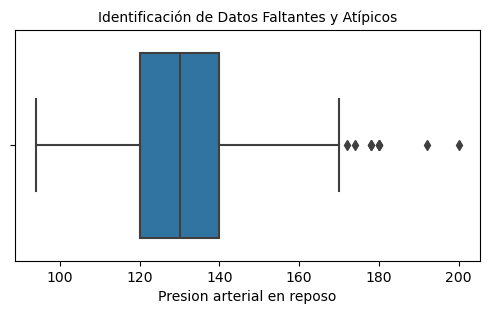

In [133]:
#Identificación de Datos Faltantes y Atípicos "Precion arteral en reposo"

plt.figure(figsize=(6, 3))
sns.boxplot(x=Pacientes['Presion arterial en reposo'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

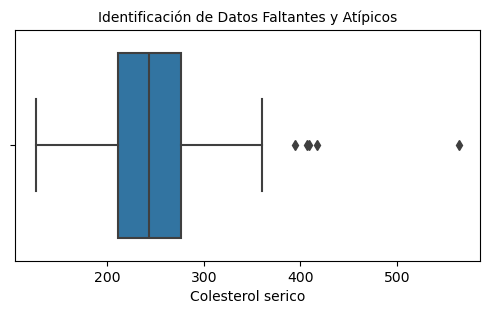

In [134]:
#Identificación de Datos Faltantes y Atípicos "Colesterol serico"

plt.figure(figsize=(6, 3))
sns.boxplot(x=Pacientes['Colesterol serico'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

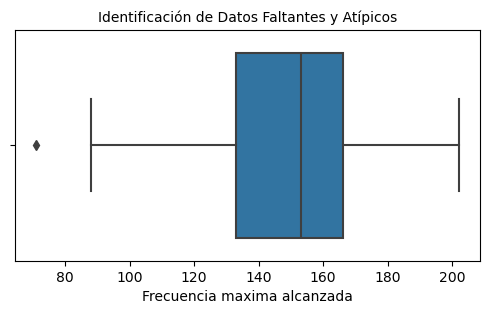

In [135]:
#Identificación de Datos Faltantes y Atípicos "Frecuencia maxima alcanzada"

plt.figure(figsize=(6, 3))
sns.boxplot(x=Pacientes['Frecuencia maxima alcanzada'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [136]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Precion Arterial en Reposo: ",Pacientes['Presion arterial en reposo'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol Serico: ",Pacientes['Colesterol serico'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia Maxima Alcanzada: ",Pacientes['Frecuencia maxima alcanzada'].isin([0]).sum())

Cantidad de Registros con cero en Precion Arterial en Reposo:  0
Cantidad de Registros con cero en Colesterol Serico:  0
Cantidad de Registros con cero en Frecuencia Maxima Alcanzada:  0


In [137]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Pacientes['Presion arterial en reposo']=Pacientes['Presion arterial en reposo'].replace(0,Pacientes['Presion arterial en reposo'].mean())
Pacientes['Colesterol serico']=Pacientes['Colesterol serico'].replace(0,Pacientes['Colesterol serico'].mean())
Pacientes['Frecuencia maxima alcanzada']=Pacientes['Frecuencia maxima alcanzada'].replace(0,Pacientes['Frecuencia maxima alcanzada'].mean())

In [138]:
#Revisión nuevamente de datos faltantes

print("Cantidad de Registros con cero en Precion Arterial en Reposo: ",Pacientes['Presion arterial en reposo'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol Serico: ",Pacientes['Colesterol serico'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia Maxima Alcanzada: ",Pacientes['Frecuencia maxima alcanzada'].isin([0]).sum())

Cantidad de Registros con cero en Precion Arterial en Reposo:  0
Cantidad de Registros con cero en Colesterol Serico:  0
Cantidad de Registros con cero en Frecuencia Maxima Alcanzada:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

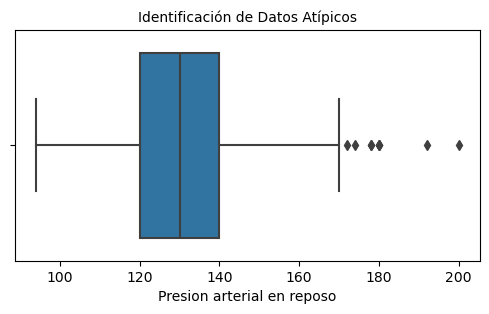

In [139]:
#Identificación de Datos Atípicos "Precion arteral en reposo"

plt.figure(figsize=(6, 3))
sns.boxplot(x=Pacientes['Presion arterial en reposo'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

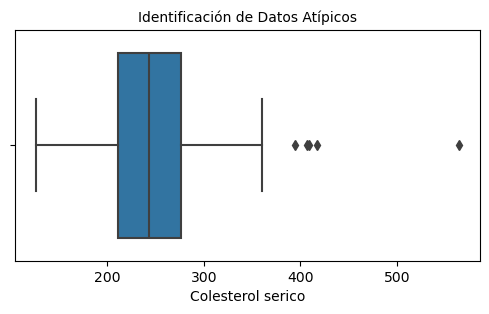

In [140]:
#Identificación de Datos Atípicos "Colesterol serico"

plt.figure(figsize=(6, 3))
sns.boxplot(x=Pacientes['Colesterol serico'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

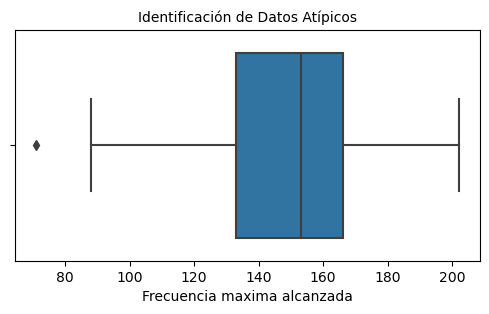

In [141]:
#Identificación de Datos Atípicos "Frecuencia maxima alcanzada"

plt.figure(figsize=(6, 3))
sns.boxplot(x=Pacientes['Frecuencia maxima alcanzada'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [142]:
#Conteo de Datos Atípicos "Precion arteral en reposo"
Presion_minimo=70
Presion_maximo=150
Total_Atipicos=((Pacientes['Presion arterial en reposo']<Presion_minimo)|(Pacientes['Presion arterial en reposo']>Presion_maximo)).sum()
print("El total de datos atípicos de Precion arteral en reposo es {}".format(Total_Atipicos))

#Conteo de Datos Atípicos "Colesterol serico"
Colesterol_minimo=120
Colesterol_maximo=300
Total_Atipicos=((Pacientes['Colesterol serico']<Colesterol_minimo)|(Pacientes['Colesterol serico']>Colesterol_maximo)).sum()
print("El total de datos atípicos de Colesterol serico es {}".format(Total_Atipicos))

#Conteo de Datos Atípicos "Frecuencia maxima alcanzada"
Frecuencia_minimo=70
Frecuencia_maximo=200
Total_Atipicos=((Pacientes['Frecuencia maxima alcanzada']<Frecuencia_minimo)|(Pacientes['Frecuencia maxima alcanzada']>Frecuencia_maximo)).sum()
print("El total de datos atípicos de la Frecuencia maxima alcanzada es {}".format(Total_Atipicos))


El total de datos atípicos de Precion arteral en reposo es 35
El total de datos atípicos de Colesterol serico es 44
El total de datos atípicos de la Frecuencia maxima alcanzada es 1


In [143]:
# Filtra Datos Atípicos "Precion arteral en reposo"
Pacientes=Pacientes[(Pacientes['Presion arterial en reposo']<Presion_maximo)&(Pacientes['Presion arterial en reposo']>Presion_minimo)]

# Filtra Datos Atípicos "Colesterol serico"
Pacientes=Pacientes[(Pacientes['Colesterol serico']<Colesterol_maximo)&(Pacientes['Colesterol serico']>Colesterol_minimo)]

# Filtra Datos Atípicos "Frecuencia maxima alcanzada"
Pacientes=Pacientes[(Pacientes['Frecuencia maxima alcanzada']<Frecuencia_maximo)&(Pacientes['Frecuencia maxima alcanzada']>Frecuencia_minimo)]


In [144]:
# Validar si se removieron los datos atípicos "Precion arteral en reposo"
Total_Atipicos=((Pacientes['Presion arterial en reposo']<Presion_minimo)|(Pacientes['Presion arterial en reposo']>Presion_maximo)).sum()
print("El total de datos atípicos de Precion arteral en reposo es {}".format(Total_Atipicos))

# Validar si se removieron los datos atípicos "Colesterol serico"
Total_Atipicos=((Pacientes['Colesterol serico']<Colesterol_minimo)|(Pacientes['Colesterol serico']>Colesterol_maximo)).sum()
print("El total de datos atípicos de Colesterol serico es {}".format(Total_Atipicos))

# Validar si se removieron los datos atípicos "Frecuencia maxima alcanzada"
Total_Atipicos=((Pacientes['Frecuencia maxima alcanzada']<Frecuencia_minimo)|(Pacientes['Frecuencia maxima alcanzada']>Frecuencia_maximo)).sum()
print("El total de datos atípicos de la Frecuencia maxima alcanzada es {}".format(Total_Atipicos))

El total de datos atípicos de Precion arteral en reposo es 0
El total de datos atípicos de Colesterol serico es 0
El total de datos atípicos de la Frecuencia maxima alcanzada es 0


In [145]:
#Revisión del tipo de datos y datos faltantes

Pacientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 1 to 296
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Edad                                        206 non-null    int64  
 1   Sexo                                        206 non-null    int64  
 2   Tipo de dolor toracico                      206 non-null    int64  
 3   Presion arterial en reposo                  206 non-null    int64  
 4   Colesterol serico                           206 non-null    int64  
 5   Glucosemina en ayunas                       206 non-null    int64  
 6   Resultados electrocardiograficos en reposo  206 non-null    int64  
 7   Frecuencia maxima alcanzada                 206 non-null    int64  
 8   Angina inducida por el ejercicio            206 non-null    int64  
 9   Deprecion del segmento ST                   206 non-null    float64
 10  Pendiente del ejerc

In [146]:
# Total de Pacientes con Enfermedad Cardíaca

Pacientes['Condicion'].value_counts()

Condicion
0    117
1     89
Name: count, dtype: int64

In [147]:
Pacientes[['Condicion']].head(40)

,Condicion
1,0
3,1
4,0
6,0
7,1
12,1
14,0
15,0
17,0
18,1


In [149]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Pacientes.drop('Condicion',axis=1) # Se cargan los datos de train sin los datos de la columna Condicion 
Y = Pacientes['Condicion'] # Se cargan los datos de train con los datos de la la columna Condicion 

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [150]:
print (X_train)

     Edad  Sexo  Tipo de dolor toracico  Presion arterial en reposo  \
294    35     1                       3                         120   
123    51     1                       2                          94   
108    54     1                       2                         120   
223    57     1                       3                         140   
61     44     1                       1                         120   
..    ...   ...                     ...                         ...   
163    67     1                       3                         100   
41     55     1                       1                         130   
198    60     1                       3                         130   
34     57     1                       1                         124   
126    50     1                       2                         140   

     Colesterol serico  Glucosemina en ayunas  \
294                198                      0   
123                227                      0   


In [151]:
print (Y_train)

294    1
123    0
108    0
223    0
61     0
      ..
163    1
41     0
198    1
34     1
126    1
Name: Condicion, Length: 154, dtype: int64


In [152]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [153]:
print (Y_test)

134    0
48     0
89     0
118    0
266    0
125    0
248    1
144    0
235    1
90     0
129    1
78     0
3      1
197    1
69     0
156    0
138    0
194    1
75     1
246    1
47     0
65     0
282    1
165    0
164    1
275    0
200    1
286    0
30     0
184    1
150    0
256    0
182    1
66     0
208    1
148    0
236    1
127    0
276    0
98     1
131    0
261    0
260    1
243    1
53     0
147    0
23     0
159    1
135    0
12     1
291    1
133    1
Name: Condicion, dtype: int64


In [154]:
print(Prediccion)

[0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1
 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0]


In [155]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        30
           1       0.74      0.77      0.76        22

    accuracy                           0.79        52
   macro avg       0.78      0.79      0.78        52
weighted avg       0.79      0.79      0.79        52



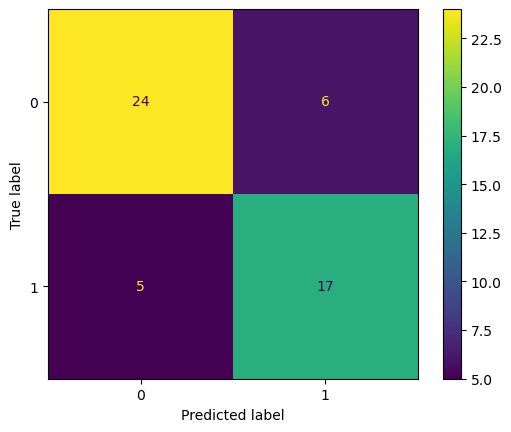

In [156]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

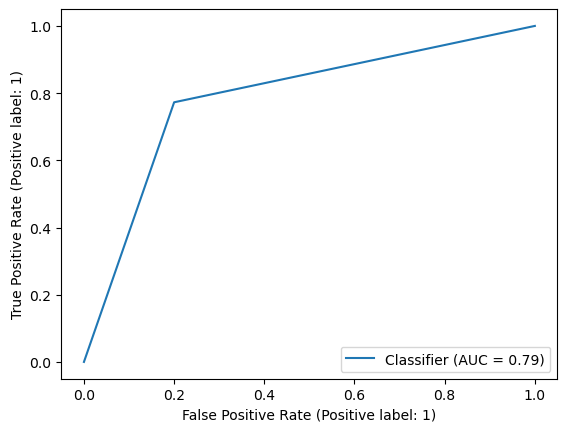

In [157]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()